# WiDS Intro to ML

In [47]:
from sklearn import datasets
import pandas as pd #Import the pandas library: Pandas is a Python library for data analysis.
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # import the class DecisionTreeClassifier which implements the decision tree classifier

%matplotlib inline
import sys

## Data Source:
- Suppose we are working on a Spotify Song recommendation system, we want to predict if a customer will like a given song or not based on the song's features.

- Data Description:
> A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for songs I don't like. Let's build a classifier that could predict whether or not I would like a song. 

> The original dataset can be found here: 
https://www.kaggle.com/datasets/geomack/spotifyclassification

<div>
<img src="dataset-cover.jpeg" width="600"/>
</div>

## Step 1: we will import the data using Panda's read_csv() function:
- In the bracket, you must include the file path of the data.
    - *Note: index_col=0, indicates what column of the csv to use as the indexes (row labels) of the dataframe. If the dataset doesn't have an id column, You generally don't have to specify that.*

In [48]:
spotify_df = pd.read_csv("data.csv", index_col = 0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Now we split the dataset into train and test sets:
> We divide our data into training and test set in the ratio 80:20 respectively (i.e if your input dataset has 100 rows, training data will be 80 rows randomly selected from the input, and test set will have the remaining 20 rows).

### Golden Rule of Machine Learning

Never mix training and test data together. Always isolate the test set, so that we can use the test set to make prediction and evaluate our model.
> You can think of `train_df` as the Practice exams & `test_df` as the FINAL exam.

Now lets look at some code:


In [49]:
#train_df will contain 80% of the input data, test_df will contain 20% of the input data (flights_df)
train_df, test_df = train_test_split(spotify_df, test_size=0.2)

In [50]:
# 1613/(1613 + 404) = 0.8
train_df.shape

(1613, 16)

In [51]:
test_df.shape

(404, 16)

## Step 2: Clean data
Let's look at the dataset information to see if there are incomplete rows

Looking at `train_df.info()` gives us a rough idea about the features being numeric or textual and the number of `NaNs` in each feature:
- Luckily, we don't have any null values in our data, as we can see below:

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 850 to 74
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1613 non-null   float64
 1   danceability      1613 non-null   float64
 2   duration_ms       1613 non-null   int64  
 3   energy            1613 non-null   float64
 4   instrumentalness  1613 non-null   float64
 5   key               1613 non-null   int64  
 6   liveness          1613 non-null   float64
 7   loudness          1613 non-null   float64
 8   mode              1613 non-null   int64  
 9   speechiness       1613 non-null   float64
 10  tempo             1613 non-null   float64
 11  time_signature    1613 non-null   float64
 12  valence           1613 non-null   float64
 13  target            1613 non-null   int64  
 14  song_title        1613 non-null   object 
 15  artist            1613 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [53]:
train_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
850,0.000173,0.641,262000,0.9540,0.42500,5,0.0535,-6.765,0,0.0589,122.790,4.0,0.8270,1,Supernature - Edit,Cerrone
1218,0.219000,0.427,257760,0.8610,0.00000,1,0.2770,-4.874,1,0.3760,161.776,4.0,0.5810,0,Best I Ever Had,Drake
969,0.147000,0.850,261321,0.5090,0.00000,6,0.0759,-9.637,0,0.3780,134.900,4.0,0.7690,1,Type of Way,Rich Homie Quan
9,0.002080,0.836,226840,0.6030,0.00000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.3860,1,Digital Animal,Honey Claws
1595,0.915000,0.277,295747,0.0156,0.00654,7,0.1480,-24.801,1,0.0482,117.119,3.0,0.0855,0,"String Quartet No. 4 in C Major, D. 46: II. An...",Franz Schubert


We can see that song title, artist and target are categorical variables. Therefore we need to transform these into numeric variables.

number dummy variables = # categories - 1

### How can we do this in python?
By Column transformer (will be introduced in the future), but if you are interested you could learn about it here: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
<div>
<img src="columntransformer.png" width="800"/>
</div>

### For simplicity, We will remove the text features from the data and just understand the model using numeric features for now, Since textual features need some preprocessing.

In [54]:
train_df = train_df.drop(columns=["song_title", "artist"])
test_df = test_df.drop(columns=["song_title", "artist"])

## Step 3: Train Model

### Now we are ready to train our model!
The next step is to build a model using a machine learning algorithm. There are a lot of algorithms out there. Each algorithm has its pros and cons in terms of the performance. For this workshop we will use a very simple algorithm called Decision Tree.
- We don't have to program this algorithm, it's actually already implemented for us in the library called scikit-learn (you will see the library imported the class DecisionTreeClassifier which implements the decision tree classifier).

### Here we are separating the target (AKA, response variables, y variable..) from the features (AKA, independent variables,predictors,x variables..)


In [55]:
# features,target :will be usedFOR TRAINING, think about them as the Practise exams and their answer keys
X_train,y_train = train_df.drop(columns=["target"]), train_df['target']

# features,target :will be used FOR TESTING, think about them as the FINAL exams and  answer keys
X_test, y_test = test_df.drop(columns=["target"]), test_df['target']

In [56]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
850,0.000173,0.641,262000,0.9540,0.425000,5,0.0535,-6.765,0,0.0589,122.790,4.0,0.8270
1218,0.219000,0.427,257760,0.8610,0.000000,1,0.2770,-4.874,1,0.3760,161.776,4.0,0.5810
969,0.147000,0.850,261321,0.5090,0.000000,6,0.0759,-9.637,0,0.3780,134.900,4.0,0.7690
9,0.002080,0.836,226840,0.6030,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.3860
1595,0.915000,0.277,295747,0.0156,0.006540,7,0.1480,-24.801,1,0.0482,117.119,3.0,0.0855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,0.941000,0.349,176297,0.2270,0.819000,6,0.1090,-12.298,1,0.0310,100.449,4.0,0.1500
585,0.004690,0.821,280173,0.4690,0.000000,8,0.1410,-7.152,1,0.0473,132.002,4.0,0.3210
755,0.023300,0.824,299960,0.5720,0.000008,11,0.2080,-4.868,1,0.0652,153.977,4.0,0.6690
1312,0.000057,0.444,268187,0.9430,0.007040,1,0.1140,-4.955,0,0.0900,119.945,4.0,0.2920


In [57]:
y_train

850     1
1218    0
969     1
9       1
1595    0
       ..
1516    0
585     1
755     1
1312    0
74      1
Name: target, Length: 1613, dtype: int64

Let's talk about Decision Tree. Our goal here is to determine weather the customer likes the song or not. We can use Decision Tree algorithm here for creating the model for classification problems like this one.

### What is a Decision Tree?

- classification model that predicts value of target based on learning simple "rules" that it obtained from the data pattern.
Let us consider the following data:
<div>
<img src="img.png" width="1000"/>
</div>

This is one possible tree for this problem.
<div>
<img src="DecisionTree.png" width="1000"/>
</div>

**Pros of Decision Tree Classifier:**

    - simple to understand
    - easy to visualize
    - generate understandable rules.
    - perform classification without requiring much computation.

**Cons:**

    - less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.
    - prone to errors in classification problems with many class and a relatively small number of training examples.

### How can we build a decision tree model in python?

Now lets fit the model:


In [58]:
# We need to create an object, let's call it model, and set it to a new instance of Decision Tree Classifier.
model = DecisionTreeClassifier()
# next we need to train it, so it learns the patterns of the INPUT train-set & OUTPUT train-set. Recall the Golden Rule of ML.
# The input is X_train, the output is y_train
model.fit(X_train, y_train)
# The output is just a visual for the model object you just fitted/trained.

DecisionTreeClassifier()

## Step 4: Make Predictions
After fitting the model, we can predict on the testing set, and also evaluate our decision tree by calculating its accuracy.

In [59]:
predict = model.predict(X_test)
predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [60]:
# combining the predicted value with the test data set:
pred_result = test_df
pred_result['predicted'] = predict.tolist()

In [61]:
pred_result

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,predicted
1723,0.00290,0.583,271093,0.681,0.000060,11,0.0999,-8.152,0,0.0585,188.256,4.0,0.570,0,1
1589,0.14700,0.554,191947,0.844,0.000007,9,0.3290,-7.763,1,0.0468,159.119,4.0,0.935,0,0
1833,0.00388,0.492,186867,0.797,0.000000,11,0.4660,-4.666,1,0.0388,79.513,4.0,0.533,0,0
1447,0.04400,0.597,192041,0.832,0.000030,11,0.0864,-5.480,0,0.1470,162.030,4.0,0.479,0,0
1561,0.90300,0.257,376573,0.216,0.134000,8,0.0979,-16.266,0,0.0365,65.125,3.0,0.190,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0.94600,0.505,294940,0.159,0.012700,7,0.2180,-11.235,0,0.0336,59.385,4.0,0.205,0,0
1240,0.03420,0.511,284947,0.815,0.000000,6,0.0900,-6.317,0,0.0480,128.004,4.0,0.245,0,1
1104,0.20400,0.685,221027,0.731,0.000000,5,0.0722,-5.119,0,0.0930,177.912,4.0,0.776,0,0
815,0.61200,0.649,175733,0.406,0.000000,2,0.1030,-10.430,1,0.0803,110.091,3.0,0.478,1,1


## Step 5: Evaluate the model and make improvement on its performance (Accuracy)

In [62]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.6856435643564357

> The test accuracy score is one of the metrics to see how our model generalize to unseen data (This is the key for Machine Learning: Our model should generalize well for new observations). We want our model to have high accuracy when predicting the test set, so we have more confident on the model accuracy after it's deployed to real world.

### Improving the model accuracy by Hyperparameter tuning:
Did some magic here to tune the parameter that goes into our DecisionTree Algorithm:

In [63]:
from sklearn.model_selection import cross_validate
import numpy as np
results_dict = {
    "max_depth": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth=depth)
    cv_score = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append( np.mean(cv_score["test_score"]))
    results_dict["mean_train_score"].append( np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,max_depth,mean_train_score,mean_cv_score
0,1,0.640490,0.634832
1,2,0.704898,0.693160
2,3,0.735897,0.714217
3,4,0.764415,0.717357
4,5,0.792519,0.734081
5,6,0.825721,0.729131
6,7,0.852310,0.717951
7,8,0.879589,0.708082
8,9,0.906384,0.703094
9,10,0.930287,0.700598


In [64]:
optimized_depth = result_df[result_df.mean_cv_score == result_df.mean_cv_score.max()].iloc[0,0]
model_optimized = DecisionTreeClassifier(max_depth = optimized_depth)
model_optimized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
optimized_depth

5

In [66]:
predict = model_optimized.predict(X_test)

accuracy = accuracy_score(y_test, predict)

accuracy

0.7178217821782178

[Text(0.53, 0.9166666666666666, 'X[4] <= 0.0\ngini = 0.5\nsamples = 1613\nvalue = [802, 811]'),
 Text(0.32, 0.75, 'X[9] <= 0.124\ngini = 0.46\nsamples = 782\nvalue = [502, 280]'),
 Text(0.16, 0.5833333333333334, 'X[1] <= 0.734\ngini = 0.384\nsamples = 579\nvalue = [429, 150]'),
 Text(0.08, 0.4166666666666667, 'X[2] <= 163780.0\ngini = 0.324\nsamples = 448\nvalue = [357, 91]'),
 Text(0.04, 0.25, 'X[5] <= 6.5\ngini = 0.48\nsamples = 30\nvalue = [12, 18]'),
 Text(0.02, 0.08333333333333333, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.06, 0.08333333333333333, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.12, 0.25, 'X[9] <= 0.043\ngini = 0.288\nsamples = 418\nvalue = [345, 73]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.193\nsamples = 212\nvalue = [189, 23]'),
 Text(0.14, 0.08333333333333333, 'gini = 0.368\nsamples = 206\nvalue = [156, 50]'),
 Text(0.24, 0.4166666666666667, 'X[12] <= 0.449\ngini = 0.495\nsamples = 131\nvalue = [72, 59]'),
 Text(0.2, 0.25, 'X[2] <= 1937

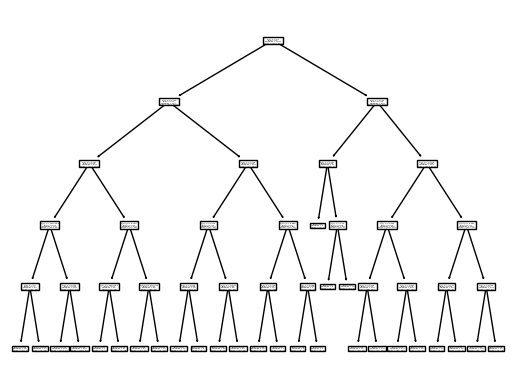

In [67]:
from sklearn import tree
tree.plot_tree(model_optimized)

In reality most classifiers will never have 100% accuracy. And indeed in our case it doesn't reach a 100% accuracy. This is just a quick demo to show you the Step 5 where further improvements on the model can be done using Hyperparameter tuning.

### Exercis for you: Let's Dive into Some Python Codes Now

Now we are building a model on the iris flower dataset. Start by importing the datasets library from `sklearn`, and load the iris data set.

In [68]:
#Load dataset + create a dataframe of this iris dataset. (you can ignore this step)
iris =  datasets.load_iris()
data = pd.DataFrame({
    'sepal_length': iris.data[:,0],
    'sepal_width': iris.data[:,1],
    'petal_length': iris.data[:,2],
    'petal_width': iris.data[:,3],
    'species': iris.target
})

data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let's print the target and feature variable names just to make sure that we are using the right dataset

In [69]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Now Please complete the `#TODO`s:

We use the `train_test_split` function to split variables into train and test set (Let's take 75% to training and 25% to testing), and train the model on the train set and perform predictions on the test set.

In [70]:
train_df, test_df = train_test_split(data, test_size = 0.25)

Since the species of iris flower is what we are interested in classifying, we first separate columns accordingly into dependent and independent variables.
Steps as follow:

In [71]:
# Seperate cols to dependent and independent variables
X_train, y_train = train_df.drop(columns=["species"]), train_df["species"]
X_test, y_test = test_df.drop(columns=["species"]), test_df["species"]

In [72]:
# create the classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# make the prediction using the Decision Tree model
y_pred = model.predict(X_test)

We now examine the Decision tree model's accuracy using the actual y (species) value and the predicted values given by the model.

In [73]:
print("The accuracy for Decision Tree model is: ", round(accuracy_score(y_test, y_pred),4))

The accuracy for Decision Tree model is:  0.9737


And we say the accuracy is pretty high for such model! To make a prediction on a single observation, we can also use the `predict()` function.
For example:  
    - sepal length = 3  
    - sepal width = 6  
    - petal length = 6  
    - petal width = 4  
Now we can predict which type of the iris flower it is as below.

In [74]:
model.predict([[3,6,6,4]])

/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

Here, the output is 2, which indicates an iris type of Virginica.

[Text(0.36363636363636365, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [36, 35, 41]'),
 Text(0.2727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.45454545454545453, 0.7857142857142857, 'X[2] <= 4.85\ngini = 0.497\nsamples = 76\nvalue = [0, 35, 41]'),
 Text(0.18181818181818182, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.111\nsamples = 34\nvalue = [0, 32, 2]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.2727272727272727, 0.5, 'X[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7272727272727273, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.133\nsamples = 42\nvalue = [0, 3, 39]'),
 Text(0.6363636363636364, 0.5, 'X[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]')

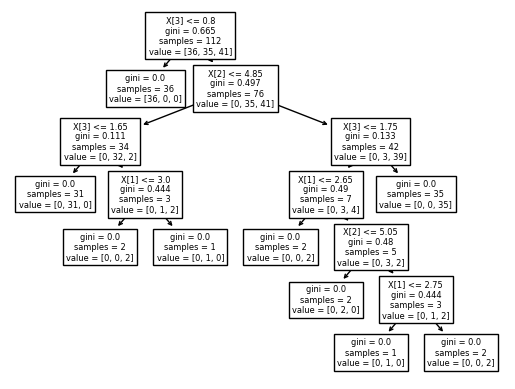

In [75]:
from sklearn import tree
tree.plot_tree(model)

<div>
<img src="survey.jpg" width="500"/>
</div>
Congratulation! You have made it so far and know what a typical Decision Tree classifier in python looks like. Please spend a minute to fill out this post workshop survey. Your feedback means a lot to us.

### references
https://www.youtube.com/watch?v=7eh4d6sabA0&ab_channel=ProgrammingwithMosh
https://github.com/hmartin11/USS_ML_Workshop
https://www.edureka.co/blog/decision-trees/

